#                           Signal Scope: A Python Tool for Signal Analysis and Visualization

1. **Introduction**
   
This notebook demonstrates basic signal processing techniques in Python by using libraries such as NumPy, SciPy, and Matplotlib. At first step, noisy signals are generated. Then, filters are pllied and Fast Fourier Transform is computed. And finally, results are visualized. 

2. **Import Necessary Libraries**

In [3]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import butter, filtfilt

3. **Create generate_signal(), compute_fft(), and low_pass_filter() functions**

In [2]:
#Define functions
def generate_signal(freq=5, noise_level=0.5, duration=2, sampling_rate=1000):
    t = np.linspace(0, duration, int(sampling_rate * duration))
    clean_signal = np.sin(2 * np.pi * freq * t)
    noise = noise_level * np.random.randn(len(t))
    signal = clean_signal + noise
    return t, signal

def compute_fft(signal, sampling_rate):
    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1 / sampling_rate)
    return xf[:N//2], np.abs(yf[:N//2])

def low_pass_filter(signal, cutoff, sampling_rate, order=5):
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype="low", analog=False)
    return filtfilt(b, a, signal)


4. **Run Analysis**

In [11]:
#Parameters
sampling_rate = 1000
duration = 2    #[s]
freq = 5        #[Hz]

#Calling the generate_signal()
t, noisy_signal = generate_signal(freq=freq, noise_level=0.5, duration=duration, sampling_rate=sampling_rate)

#Calling the low_pass_filter()
filtered_signal = low_pass_filter(noisy_signal, cutoff=10, sampling_rate=sampling_rate)

#Calling the coompute_fft()
xf, yf = compute_fft(noisy_signal, sampling_rate)
xf_filt, yf_filt = compute_fft(filtered_signal, sampling_rate)

5. **Visualize Results**

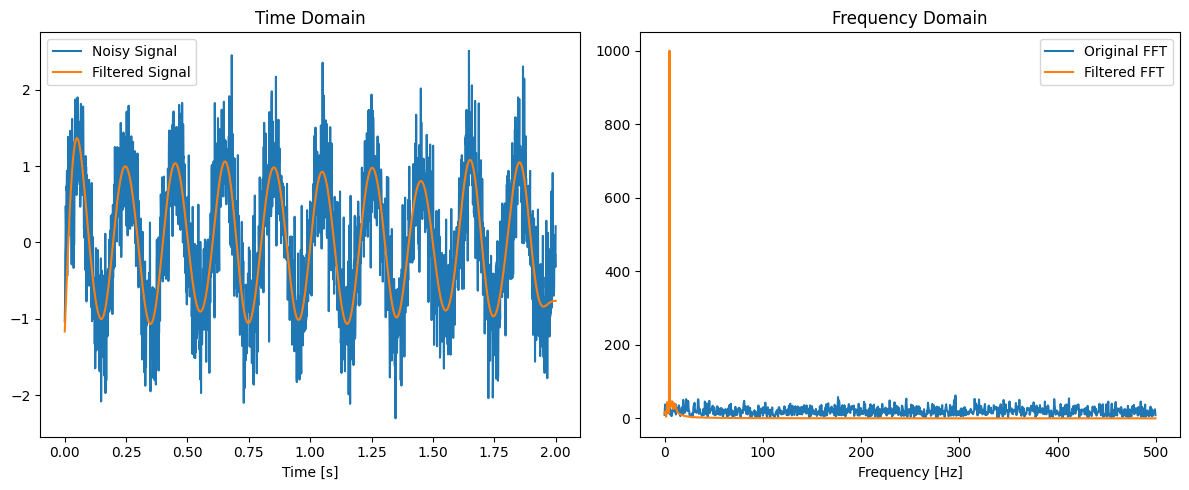

In [12]:
plt.figure(figsize=(12, 5))


#Time domain
plt.subplot(1, 2, 1)
plt.plot(t, noisy_signal, label="Noisy Signal")
plt.plot(t, filtered_signal, label="Filtered Signal")
plt.xlabel("Time [s]")
plt.title("Time Domain")
plt.legend()

#Frequency domain
plt.subplot(1, 2, 2)
plt.plot(xf, yf, label="Original FFT")
plt.plot(xf_filt, yf_filt, label="Filtered FFT")
plt.xlabel("Frequency [Hz]")
plt.title("Frequency Domain")
plt.legend()

plt.tight_layout()
plt.show()